In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import glob

glob.glob("./input/*")

['./input\\sample_submission.csv', './input\\test.csv', './input\\train.csv']

## データの中身を覗いてみる

In [3]:
df=pd.read_csv("./input/train.csv")

df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(df)

42000

## labelの値を別に取り分けて、他を画像データの配列として格納

In [5]:
labels=df["label"].values
df.drop("label", axis=1, inplace=True)
pixels=df.values

pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
type(pixels)

numpy.ndarray

In [7]:
len(pixels)

42000

In [8]:
len(pixels[0])

784

**28×28=784の配列であると確認**

In [9]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

#### グレースケールのはずなので最大値を確認

In [10]:
max(pixels[0])

255

## PILに渡す画像配列の形に成形した後、実際に画像を表示してみる

In [11]:
pixels=pixels/255
pixels=pixels.reshape(len(df),28,28)

pixels

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
len(pixels[0][0])

28

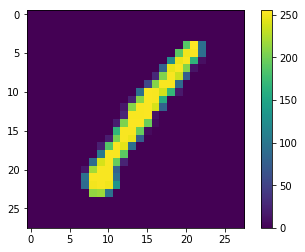

In [13]:
img=Image.fromarray(np.uint8(pixels[0]*255))

plt.imshow(img)
plt.colorbar()

## 一方で縦方向と横方向に有色ピクセルの数分布を取ってみる

In [14]:
vertical=np.array([0 for i in range(28)])
holizontal=np.array([0 for i in range(28)])

for i in range(28):
    for j in range(28):
        if(pixels[0][i][j]>0):
            vertical[j]+=1.0
            holizontal[i]+=1.0
            
vertical=vertical/max(vertical)
holizontal=holizontal/max(holizontal)

print(vertical)

[0.         0.         0.         0.         0.         0.
 0.         0.33333333 0.55555556 0.77777778 0.88888889 1.
 0.88888889 0.77777778 0.77777778 0.77777778 0.77777778 0.66666667
 0.55555556 0.66666667 0.55555556 0.44444444 0.33333333 0.
 0.         0.         0.         0.        ]


**なにか面白そうな特徴がある**

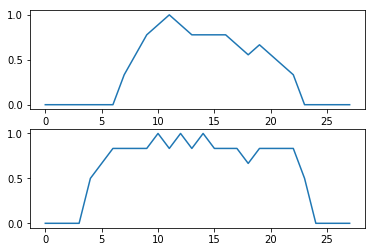

In [15]:
plt.subplot(2,1,1)
plt.plot(vertical)
plt.subplot(2,1,2)
plt.plot(holizontal)

In [16]:
#labels=keras.utils.np_utils.to_categorical(labels, 10)

In [17]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [18]:
df_test=pd.read_csv("./input/test.csv")

pixels_test=df_test.values

pixels_test=pixels_test/255
pixels_test=pixels_test.reshape(len(df_test),28,28)

pixels_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

---
# 以上の2つのデータを用いてCNNを組んでみる

In [33]:
import keras
import tensorflow as tf

In [34]:
model=keras.Sequential([
#    keras.layers.Conv2D(),
#    keras.layers.pooling(),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(280, activation=tf.nn.relu), #input distribution
    keras.layers.Dense(28, activation=tf.nn.relu),
    keras.layers.Dense(10, activation="softmax"),
])

In [35]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 280)               219800    
_________________________________________________________________
dense_8 (Dense)              (None, 28)                7868      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                290       
Total params: 227,958
Trainable params: 227,958
Non-trainable params: 0
_________________________________________________________________


In [36]:
fit=model.fit(pixels,labels,epochs=200,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 4s 115us/step - loss: 2.3365 - acc: 0.1107 - val_loss: 2.3105 - val_acc: 0.1344
Epoch 2/200
33600/33600 [==============================] - 3s 103us/step - loss: 2.2956 - acc: 0.1437 - val_loss: 2.2716 - val_acc: 0.1695
Epoch 3/200
33600/33600 [==============================] - 3s 104us/step - loss: 2.2589 - acc: 0.1803 - val_loss: 2.2357 - val_acc: 0.2083
Epoch 4/200
33600/33600 [==============================] - 3s 102us/step - loss: 2.2246 - acc: 0.2176 - val_loss: 2.2021 - val_acc: 0.2408
Epoch 5/200
33600/33600 [==============================] - 3s 102us/step - loss: 2.1924 - acc: 0.2514 - val_loss: 2.1699 - val_acc: 0.2704
Epoch 6/200
33600/33600 [==============================] - 4s 110us/step - loss: 2.1613 - acc: 0.2793 - val_loss: 2.1387 - val_acc: 0.2979
Epoch 7/200
33600/33600 [==============================] - 4s 106us/step - loss: 2.1311 - acc: 0.3019 - val_loss: 2.1

33600/33600 [==============================] - 4s 108us/step - loss: 1.0315 - acc: 0.7747 - val_loss: 1.0184 - val_acc: 0.7762
Epoch 60/200
33600/33600 [==============================] - 3s 99us/step - loss: 1.0195 - acc: 0.7778 - val_loss: 1.0067 - val_acc: 0.7782
Epoch 61/200
33600/33600 [==============================] - 4s 114us/step - loss: 1.0078 - acc: 0.7811 - val_loss: 0.9952 - val_acc: 0.7811
Epoch 62/200
33600/33600 [==============================] - 4s 113us/step - loss: 0.9963 - acc: 0.7839 - val_loss: 0.9840 - val_acc: 0.7842
Epoch 63/200
33600/33600 [==============================] - 4s 113us/step - loss: 0.9851 - acc: 0.7868 - val_loss: 0.9730 - val_acc: 0.7874
Epoch 64/200
33600/33600 [==============================] - 4s 112us/step - loss: 0.9740 - acc: 0.7899 - val_loss: 0.9623 - val_acc: 0.7900
Epoch 65/200
33600/33600 [==============================] - 4s 113us/step - loss: 0.9632 - acc: 0.7931 - val_loss: 0.9517 - val_acc: 0.7930
Epoch 66/200
33600/33600 [========

33600/33600 [==============================] - 4s 104us/step - loss: 0.6189 - acc: 0.8537 - val_loss: 0.6159 - val_acc: 0.8544
Epoch 118/200
33600/33600 [==============================] - 4s 117us/step - loss: 0.6152 - acc: 0.8543 - val_loss: 0.6122 - val_acc: 0.8548
Epoch 119/200
33600/33600 [==============================] - 4s 113us/step - loss: 0.6115 - acc: 0.8551 - val_loss: 0.6086 - val_acc: 0.8556
Epoch 120/200
33600/33600 [==============================] - 3s 104us/step - loss: 0.6079 - acc: 0.8558 - val_loss: 0.6051 - val_acc: 0.8560
Epoch 121/200
33600/33600 [==============================] - 3s 101us/step - loss: 0.6044 - acc: 0.8562 - val_loss: 0.6017 - val_acc: 0.8564
Epoch 122/200
33600/33600 [==============================] - 3s 96us/step - loss: 0.6010 - acc: 0.8569 - val_loss: 0.5983 - val_acc: 0.8568
Epoch 123/200
33600/33600 [==============================] - 3s 100us/step - loss: 0.5976 - acc: 0.8575 - val_loss: 0.5950 - val_acc: 0.8581
Epoch 124/200
33600/33600 [=

33600/33600 [==============================] - 3s 96us/step - loss: 0.4775 - acc: 0.8796 - val_loss: 0.4766 - val_acc: 0.8793
Epoch 176/200
33600/33600 [==============================] - 3s 102us/step - loss: 0.4760 - acc: 0.8800 - val_loss: 0.4750 - val_acc: 0.8794
Epoch 177/200
33600/33600 [==============================] - 3s 102us/step - loss: 0.4744 - acc: 0.8803 - val_loss: 0.4735 - val_acc: 0.8799
Epoch 178/200
33600/33600 [==============================] - 3s 102us/step - loss: 0.4728 - acc: 0.8807 - val_loss: 0.4719 - val_acc: 0.8802
Epoch 179/200
33600/33600 [==============================] - 3s 101us/step - loss: 0.4713 - acc: 0.8807 - val_loss: 0.4704 - val_acc: 0.8805
Epoch 180/200
33600/33600 [==============================] - 3s 100us/step - loss: 0.4698 - acc: 0.8814 - val_loss: 0.4689 - val_acc: 0.8811
Epoch 181/200
33600/33600 [==============================] - 3s 98us/step - loss: 0.4683 - acc: 0.8815 - val_loss: 0.4674 - val_acc: 0.8811
Epoch 182/200
33600/33600 [==

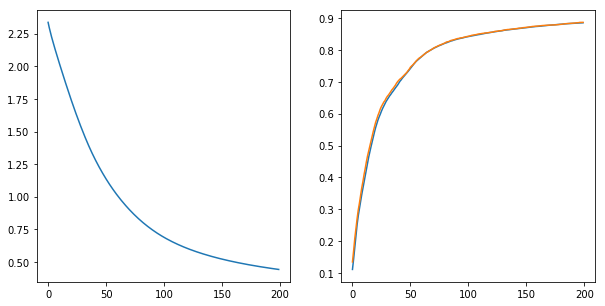

In [37]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(fit.history["loss"])
plt.subplot(1,2,2)
plt.plot(fit.history["acc"])
plt.plot(fit.history["val_acc"])

In [39]:
test_loss, test_acc = model.evaluate(pixels, labels)

print("Test_accuracy:", test_acc)

42000/42000 [==============================] - 2s 39us/step
Test_accuracy: 0.8864285714285715


# テストデータを予測する

In [40]:
data=model.predict(pixels_test)

In [41]:
number_prediction=np.array([])

for i in range(len(data)):
    number_prediction=np.append(number_prediction, np.argmax(data[i]))
    
number_prediction=number_prediction.astype(np.int64)
    
number_prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

# 出力

In [42]:
df_out_view=pd.read_csv("./input/test.csv", nrows=10)

df_out_view

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
ImgId=np.array([i+1 for i in range(len(number_prediction))])

dic={"ImageId":ImgId, "label":number_prediction}

df_out=pd.DataFrame(dic)

df_out

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [44]:
df_out.to_csv("./output/submission.csv", index=False)